In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install holidays-es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read the data

In [4]:
# read the data
import pandas as pd
import numpy as np

traindf = pd.read_table("gdrive/MyDrive/data/dataset/train.csv", index_col = 0, sep = ",")
testdf = pd.read_table("gdrive/MyDrive/data/dataset/test.csv", index_col = 0, sep = ",")
#testdf = testdf[0:-1]

traindf['total load actual'] = traindf['total load actual'].astype('float64').fillna(method='bfill')
testdf['total load actual'] = testdf['total load actual'].astype('float64').fillna(method='bfill')

# Normalization and Formatting

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(traindf['total load actual'].values.reshape(-1,1))
traindf['actual'] = scaler.transform(traindf['total load actual'].values.reshape(-1, 1))
testdf['actual'] = scaler.transform(testdf['total load actual'].values.reshape(-1, 1))

In [6]:
traindf.index = traindf.index.astype("datetime64[ns]")
traindf.index = pd.DatetimeIndex(traindf.index.values,
                               freq=traindf.index.inferred_freq)

testdf.index = testdf.index.astype("datetime64[ns]")
testdf.index = pd.DatetimeIndex(testdf.index.values,
                               freq=testdf.index.inferred_freq)

In [7]:
trainProphet = pd.DataFrame({'ds':traindf.index.values, 'y':traindf['actual']})
testProphet = pd.DataFrame({'ds':testdf.index.values, 'y':testdf['actual']})

# Exogenous features selection

In [ ]:
traindf.columns

Index(['total load actual', 'Valencia_temp', 'Valencia_temp_min',
       'Valencia_temp_max', 'Valencia_pressure', 'Valencia_humidity',
       'Valencia_wind_speed', 'Valencia_wind_deg', 'Valencia_rain_1h',
       'Valencia_rain_3h', 'Valencia_snow_3h', 'Valencia_clouds_all',
       'Valencia_weather_id', 'Madrid_temp', 'Madrid_temp_min',
       'Madrid_temp_max', 'Madrid_pressure', 'Madrid_humidity',
       'Madrid_wind_speed', 'Madrid_wind_deg', 'Madrid_rain_1h',
       'Madrid_rain_3h', 'Madrid_snow_3h', 'Madrid_clouds_all',
       'Madrid_weather_id', 'Bilbao_temp', 'Bilbao_temp_min',
       'Bilbao_temp_max', 'Bilbao_pressure', 'Bilbao_humidity',
       'Bilbao_wind_speed', 'Bilbao_wind_deg', 'Bilbao_rain_1h',
       'Bilbao_rain_3h', 'Bilbao_snow_3h', 'Bilbao_clouds_all',
       'Bilbao_weather_id', ' Barcelona_temp', ' Barcelona_temp_min',
       ' Barcelona_temp_max', ' Barcelona_pressure', ' Barcelona_humidity',
       ' Barcelona_wind_speed', ' Barcelona_wind_deg', ' Barcelon

In [8]:
traindf['temp'] = (traindf[' Barcelona_temp'] + traindf['Bilbao_temp'] + traindf['Madrid_temp'] + traindf['Seville_temp'] + traindf['Valencia_temp'])/5

traindf['humidity'] = (traindf[' Barcelona_humidity'] + traindf['Bilbao_humidity'] + traindf['Madrid_humidity'] + traindf['Seville_humidity'] + traindf['Valencia_humidity'])/5

traindf['wind_speed'] = (traindf[' Barcelona_wind_speed'] + traindf['Bilbao_wind_speed'] + traindf['Madrid_wind_speed'] + traindf['Seville_wind_speed'] + traindf['Valencia_wind_speed'])/5

traindf['wind_deg'] = (traindf[' Barcelona_wind_deg'] + traindf['Bilbao_wind_deg'] + traindf['Madrid_wind_deg'] + traindf['Seville_wind_deg'] + traindf['Valencia_wind_deg'])/5

traindf['rain_1h'] = (traindf[' Barcelona_rain_1h'] + traindf['Bilbao_rain_1h'] + traindf['Madrid_rain_1h'] + traindf['Seville_rain_1h'] + traindf['Valencia_rain_1h'])/5

traindf['rain_3h'] = (traindf[' Barcelona_rain_3h'] + traindf['Bilbao_rain_3h'] + traindf['Madrid_rain_3h'] + traindf['Seville_rain_3h'] + traindf['Valencia_rain_3h'])/5

traindf['snow_3h'] = (traindf[' Barcelona_snow_3h'] + traindf['Bilbao_snow_3h'] + traindf['Madrid_snow_3h'] + traindf['Seville_snow_3h'] + traindf['Valencia_snow_3h'])/5

traindf['clouds_all'] = (traindf[' Barcelona_clouds_all'] + traindf['Bilbao_clouds_all'] + traindf['Madrid_clouds_all'] + traindf['Seville_clouds_all'] + traindf['Valencia_clouds_all'])/5

In [9]:
import statistics
from scipy import stats

print("Variance of temp is % s" %(statistics.variance(traindf['temp'])))
print("Cor of temp is % s" %(stats.spearmanr(traindf['temp'], traindf['actual'])[0]))   ####
print("\n")

print("Variance of humidity is % s" %(statistics.variance(traindf['humidity'])))
print("Cor of humidity is % s" %(stats.spearmanr(traindf['humidity'], traindf['actual'])[0]))  #####
print("\n")

print("Variance of wind_speed is % s" %(statistics.variance(traindf['wind_speed'])))
print("Cor of wind_speed is % s" %(stats.spearmanr(traindf['wind_speed'], traindf['actual'])[0]))  ####
print("\n")

print("Variance of wind_deg is % s" %(statistics.variance(traindf['wind_deg'])))
print("Cor of wind_deg is % s" %(stats.spearmanr(traindf['wind_deg'], traindf['actual'])[0]))
print("\n")

print("Variance of rain_1h is % s" %(statistics.variance(traindf['rain_1h'])))
print("Cor of rain_1h is % s" %(stats.spearmanr(traindf['rain_1h'], traindf['actual'])[0]))
print("\n")

print("Variance of rain_3h is % s" %(statistics.variance(traindf['rain_3h'])))
print("Cor of rain_3h is % s" %(stats.spearmanr(traindf['rain_3h'], traindf['actual'])[0]))
print("\n")

print("Variance of snow_3h is % s" %(statistics.variance(traindf['snow_3h'])))
print("Cor of snow_3h is % s" %(stats.spearmanr(traindf['snow_3h'], traindf['actual'])[0]))
print("\n")

print("Variance of clouds_all is % s" %(statistics.variance(traindf['clouds_all'])))
print("Cor of clouds_all is % s" %(stats.spearmanr(traindf['clouds_all'], traindf['actual'])[0]))
print("\n")

Variance of temp is 53.63490995896526
Cor of temp is 0.17095734778100175


Variance of humidity is 217.5993228171428
Cor of humidity is -0.35906826122153934


Variance of wind_speed is 1.9092779208433124
Cor of wind_speed is 0.21282520517864942


Variance of wind_deg is 3304.0201620866906
Cor of wind_deg is -0.08653351732900262


Variance of rain_1h is 0.04347364461062169
Cor of rain_1h is 0.009357750824441242


Variance of rain_3h is 1.4063513499215299e-05
Cor of rain_3h is -0.04521435178351718


Variance of snow_3h is 0.012770156649090252
Cor of snow_3h is 0.009313135855383585


Variance of clouds_all is 299.7303936831634
Cor of clouds_all is 0.020156349523466233




In [10]:
testdf['temp'] = (testdf[' Barcelona_temp'] + testdf['Bilbao_temp'] + testdf['Madrid_temp'] + testdf['Seville_temp'] + testdf['Valencia_temp'])/5

testdf['humidity'] = (testdf[' Barcelona_humidity'] + testdf['Bilbao_humidity'] + testdf['Madrid_humidity'] + testdf['Seville_humidity'] + testdf['Valencia_humidity'])/5

testdf['wind_speed'] = (testdf[' Barcelona_wind_speed'] + testdf['Bilbao_wind_speed'] + testdf['Madrid_wind_speed'] + testdf['Seville_wind_speed'] + testdf['Valencia_wind_speed'])/5

# Get Holidays

In [11]:
trainHolidays = pd.DataFrame({'ds':traindf.index.values})
testHolidays = pd.DataFrame({'ds':testdf.index.values})

In [12]:
from pandas.core.indexes.api import all_indexes_same
from holidays_es import get_provinces, Province

years = range(2014, 2020)
provinces = ["valencia", "madrid", "bilbao", "barcelona", "sevilla"]
holidays = []

for one_year in years:
  for one_province in provinces:
    
    all_holidays = Province(name=one_province, year=one_year).holidays()
    holidays = holidays + all_holidays['local_holidays'] + all_holidays['national_holidays'] + all_holidays['regional_holidays']


holidays = np.unique(holidays)

In [13]:
import datetime

hourly_holidays = []

for one_holiday in holidays:
  for one_hour in range(0, 24):
    
    dt = datetime.datetime.combine(one_holiday, datetime.time(one_hour, 00, 00))
    hourly_holidays = hourly_holidays + [dt]


In [14]:
trainHolidays['is_holiday'] = trainHolidays['ds'].isin([d for d in hourly_holidays])
trainHolidays['holiday'] = "ES Holiday"
trainHolidays = trainHolidays[trainHolidays['is_holiday']]
trainHolidays.drop(['is_holiday'], axis=1)

testHolidays['is_holiday'] = testHolidays['ds'].isin([d for d in hourly_holidays])
testHolidays['holiday'] = "ES Holiday"
testHolidays = testHolidays[testHolidays['is_holiday']]
testHolidays.drop(['is_holiday'], axis=1)

,ds,holiday
102,2018-03-19 00:00:00,ES Holiday
103,2018-03-19 01:00:00,ES Holiday
104,2018-03-19 02:00:00,ES Holiday
105,2018-03-19 03:00:00,ES Holiday
106,2018-03-19 04:00:00,ES Holiday
...,...,...
6889,2018-12-26 19:00:00,ES Holiday
6890,2018-12-26 20:00:00,ES Holiday
6891,2018-12-26 21:00:00,ES Holiday
6892,2018-12-26 22:00:00,ES Holiday


In [15]:
# allProphet = pd.concat([trainProphet, testProphet], sort=False)
allHolidays = pd.concat([trainHolidays, testHolidays], sort=False)

In [16]:
trainProphet['temp'] = traindf['temp'].fillna(method='bfill')
trainProphet['humidity'] = traindf['humidity'].fillna(method='bfill')
trainProphet['wind_speed'] = traindf['wind_speed'].fillna(method='bfill')

# Train model with added regressors

In [47]:
m = Prophet(seasonality_mode='multiplicative', holidays = allHolidays, uncertainty_samples =0)

m.add_regressor('temp')
m.add_regressor('humidity')
m.add_regressor('wind_speed')

res = m.fit(trainProphet)

step = 24
predictions = list()
observations = list()

{'mape': 0.31328652412913155, 'mae': 0.1087739997491699, 'mse': 0.01930031501041677, 'rmse': 0.1389255736371701}


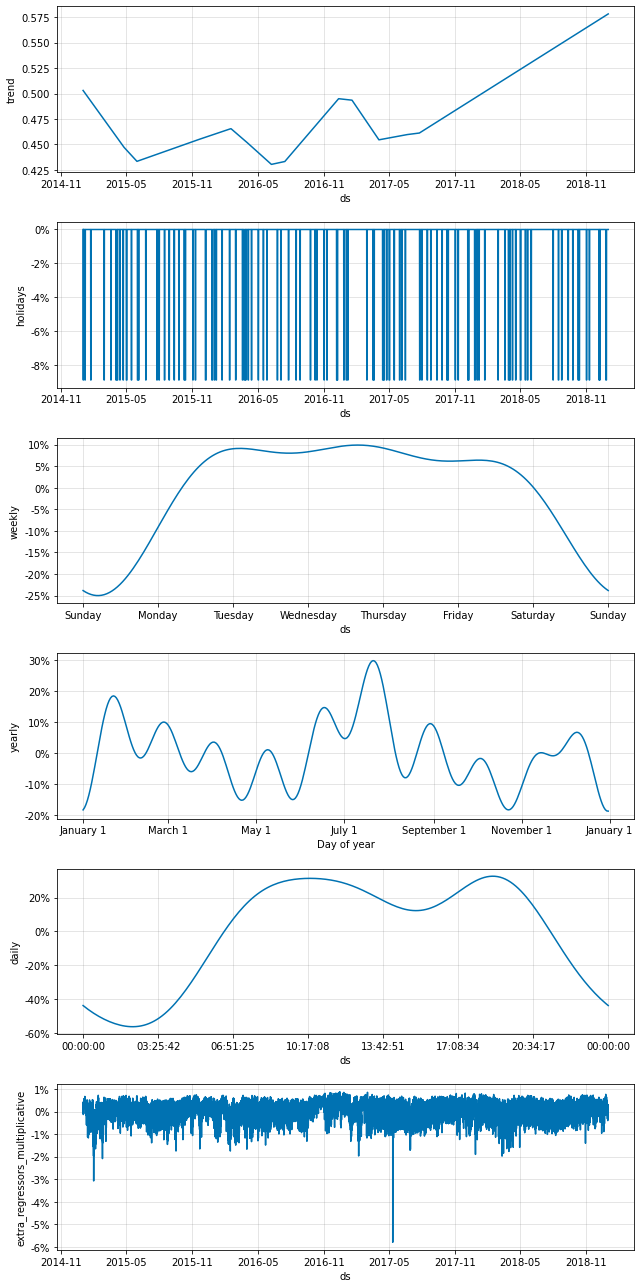

In [48]:
future = res.make_future_dataframe(freq='H',periods = testProphet.shape[0])
future['temp'] = pd.concat([traindf['temp'], testdf['temp'].fillna(method='bfill')]).reset_index(drop = True)
future['humidity'] = pd.concat([traindf['humidity'], testdf['humidity'].fillna(method='bfill')]).reset_index(drop = True)
future['wind_speed'] = pd.concat([traindf['wind_speed'], testdf['wind_speed'].fillna(method='bfill')]).reset_index(drop = True)

output = res.predict(future)

from math import sqrt
from sklearn.metrics import mean_squared_error

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = mean_squared_error(forecast, actual)   # MSE
    rmse = sqrt(mean_squared_error(forecast, actual))  # RMSE
  
    
    return({'mape':mape, 'mae': mae, 'mse': mse, 'rmse':rmse})

print(forecast_accuracy(output.yhat.tail(testProphet.shape[0]).reset_index(drop = True), testProphet['y'].reset_index(drop = True)))  

m.plot_components(output);

In [24]:
predictions = output.yhat.tail(testProphet.shape[0])
predictions = predictions[23:]

observations = testProphet['y'].reset_index(drop = True)
observations = observations[23:]

In [25]:
newdf = pd.DataFrame({'forecast':predictions, 'actual':observations})
newdf.to_csv("gdrive/MyDrive/data/dataset/resultsProphetNew.csv")

# Train simple model

In [ ]:
m = Prophet(seasonality_mode='multiplicative', holidays = allHolidays, uncertainty_samples =0)

res = m.fit(trainProphet)

step = 24
predictions = list()
observations = list()

In [ ]:
#for t in range(500-step):
for t in range(testProphet.shape[0]-step):
    
    future = res.make_future_dataframe(freq='H',periods = step)
    #future = future[0:trainProphet.shape[0]].append(future.tail(1))
    output = res.predict(future)
    yhat = output.yhat.iloc[-1]
    if t%100==0:
      print(t)
    predictions.append(yhat)
    obs = testProphet.y[t+step-1]
    observations.append(obs)

    res.history = res.history.append({'ds':testProphet.ds[t], 
                                      'y': testProphet.y[t],
                                      'floor': 0, 
                                      't': 1,
                                      'y_scaled': testProphet.y[t]}, ignore_index=True)
    
    res.history.t = res.history.t.shift(periods=1, fill_value=0)
    res.history_dates[len(res.history_dates)] = testProphet.ds[t]

    res.history.drop(index=res.history.index[0], axis=0, inplace=True)
    res.history_dates.drop(index=res.history_dates.index[0], axis=0, inplace=True)

newdf = pd.DataFrame({'forecast':predictions, 'actual':observations})
newdf.to_csv("gdrive/MyDrive/data/dataset/resultsProphet.csv")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900


In [ ]:
# from fbprophet.diagnostics import cross_validation

# #INITIAL
# initial = str(trainProphet.shape[0]) + " hours"

# #PERIOD
# periods = str(1) + " hours" 

# #HORIZON
# horizon = "24 hours"

In [ ]:
#df_cv = cross_validation(m, initial=initial, period=periods, horizon=horizon)

INFO:fbprophet:Making 6989 forecasts with cutoffs between 2018-03-14 18:00:00 and 2018-12-30 22:00:00


  0%|          | 0/6989 [00:00<?, ?it/s]

SystemError: ignored

In [26]:
#m.plot_components(output);

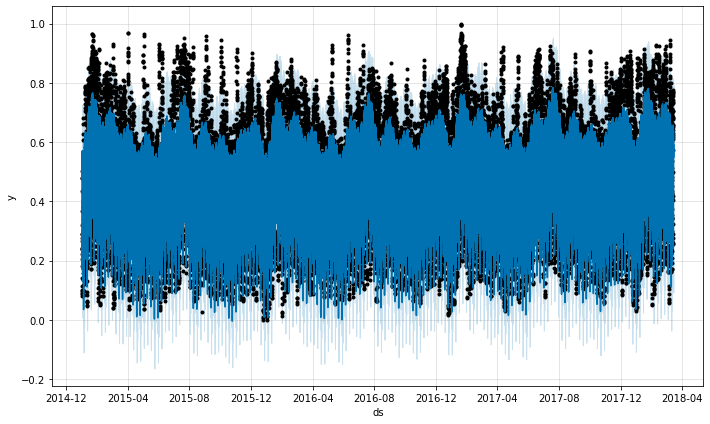

In [ ]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)
#m.plot(forecast);

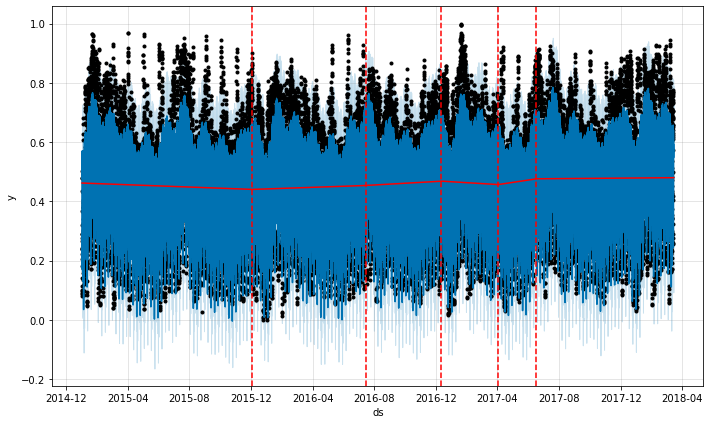

In [ ]:
# from fbprophet.plot import add_changepoints_to_plot
# fig = m.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), m, forecast)

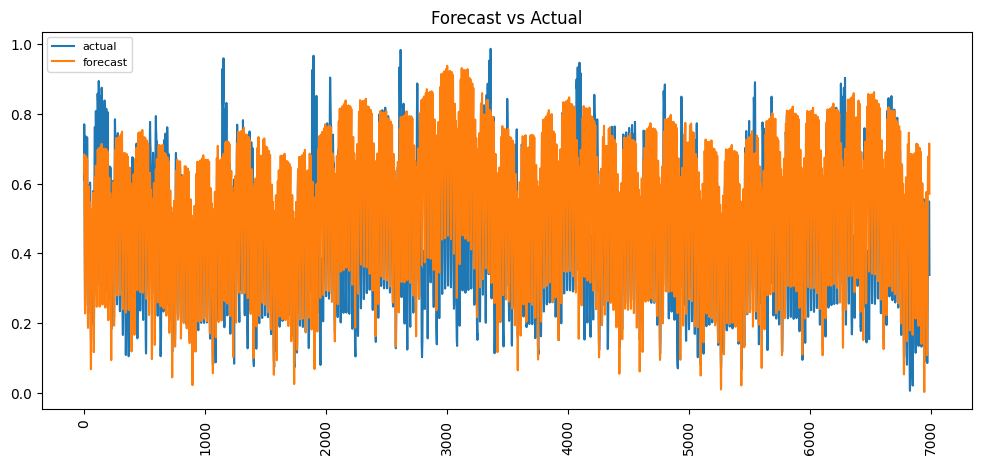

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(newdf['actual'], label='actual')
plt.plot(newdf['forecast'], label='forecast')

plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(fontsize=10, rotation=90)
#plt.xticks([])
plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = mean_squared_error(forecast, actual)   # MSE
    rmse = sqrt(mean_squared_error(forecast, actual))  # RMSE
  
    
    return({'mape':mape, 'mae': mae, 'mse': mse, 'rmse':rmse})


In [ ]:
print(forecast_accuracy(newdf['forecast'], newdf['actual']))  

{'mape': 0.3264332745787427, 'mae': 0.11358526516349551, 'mse': 0.02074961729781337, 'rmse': 0.144047274524072}


# Just energy data
{'mape': 0.3264332745787427, 'mae': 0.11358526516349551, 'mse': 0.02074961729781337, 'rmse': 0.144047274524072}

# Added regressors
{'mape': 0.31328652412913155, 'mae': 0.1087739997491699, 'mse': 0.01930031501041677, 'rmse': 0.1389255736371701}